In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [86]:
ds = pd.read_csv('aggregate_covid_country.csv')
ds.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [87]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [88]:
ds.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [89]:
ds.Country.value_counts()

Bahamas                     126
Russia                      126
Moldova                     126
Rwanda                      126
Monaco                      126
                           ... 
Saint Kitts and Nevis       126
Georgia                     126
Senegal                     126
South Sudan                 126
Central African Republic    126
Name: Country, Length: 188, dtype: int64

In [90]:
ds['Date']  = pd.to_datetime(ds['Date'])

###  Aggregate analysis of effect of COVID-19 by Country

In [91]:
total_case = ds.groupby(['Country']).Confirmed.agg(['sum']).sort_values('sum',
                            ascending = False).rename(columns = dict(sum = 'Total Case'))
total_case

,Total Case
Country,
US,57098767
Italy,11896347
Spain,11890691
United Kingdom,9150537
Germany,9046257
...,...
Bhutan,608
MS Zaandam,512
Papua New Guinea,359


In [92]:
total_case_by_country = total_case[total_case['Total Case'] != 0]

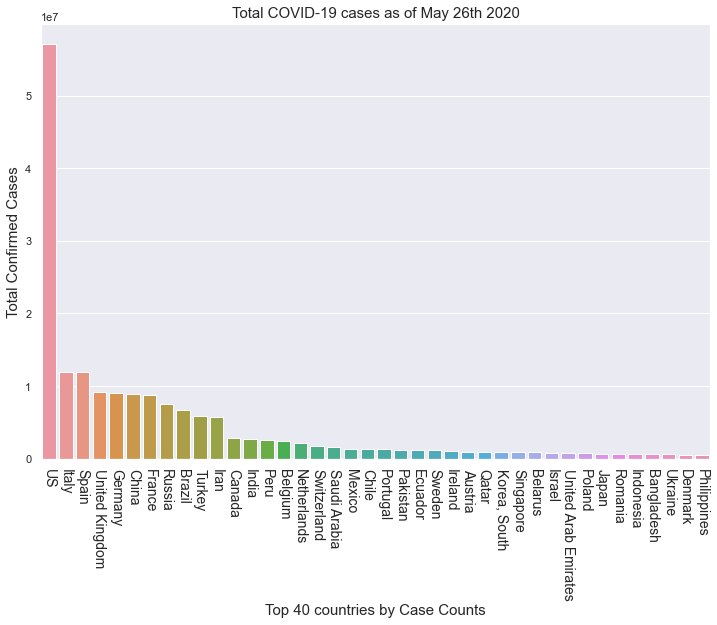

In [93]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(x =  total_case_by_country.index[:40], y = 'Total Case',
           data = total_case_by_country.head(40))
ax.set_xticklabels(total_case_by_country.index[:40],
                  fontsize = 14, rotation = -90)
plt.xlabel('Top 40 countries by Case Counts', fontsize = 15)
plt.ylabel('Total Confirmed Cases', fontsize = 15)
plt.title('Total COVID-19 cases as of May 26th 2020', fontsize = 15)

fig.set_size_inches(12,8)
plt.show() 

US and most of the European countries were effected most by the COVID virus, even though these 
countries are geographically far apart from China where the virus originally transmitted.This could 
possibly be due to transmission power of COVID virus and unable to implement the protocols on time.

In [94]:
total_deaths = ds.groupby(['Country']).Deaths.agg(['sum']).sort_values('sum',
                            ascending = False).rename(columns = dict(sum = 'Total Death'))
total_deaths

,Total Death
Country,
US,3221969
Italy,1568276
United Kingdom,1329006
Spain,1302010
France,1209634
...,...
Saint Vincent and the Grenadines,0
Fiji,0
Cambodia,0


In [95]:
total_deaths_by_country = total_deaths[total_deaths['Total Death'] != 0]

In [96]:
total_deaths_by_country

,Total Death
Country,
US,3221969
Italy,1568276
United Kingdom,1329006
Spain,1302010
France,1209634
...,...
Comoros,21
Madagascar,18
Central African Republic,4


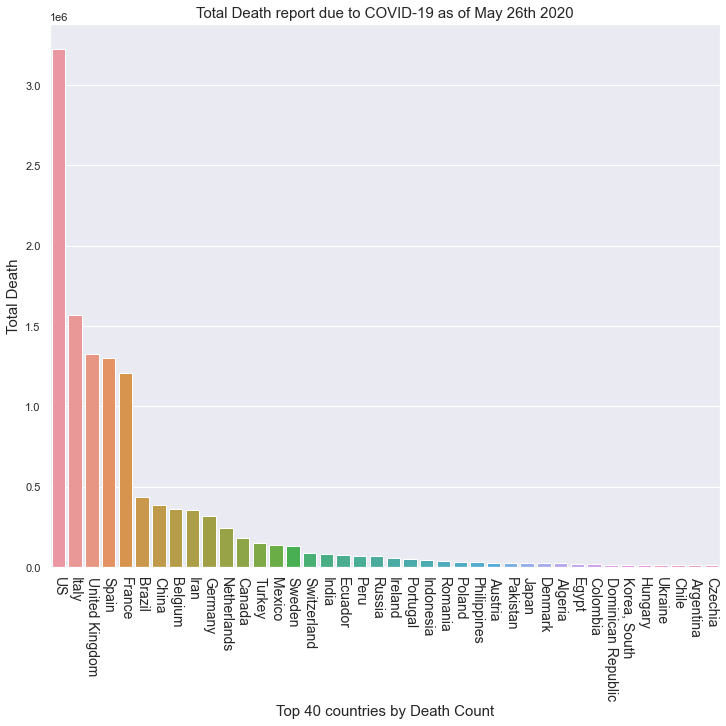

In [97]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(x =  total_deaths_by_country.index[:40], y = 'Total Death',
           data = total_deaths_by_country.head(40))
ax.set_xticklabels(total_deaths_by_country.index[:40],
                  fontsize = 14, rotation = -90)
plt.xlabel('Top 40 countries by Death Count', fontsize = 15)
plt.ylabel('Total Death', fontsize = 15)
plt.title('Total Death report due to COVID-19 as of May 26th 2020', fontsize = 15)

fig.set_size_inches(12,10)
plt.show() 

Due to highest confirmed cases in US, Italy, United Kingdom and others, it was obvious that even the 
high standards healtcare systems on these countries was not enough to provide the 'exponentially' growing infected population at these regions. Hence, due to these factor, the death toll on these counrties were highest among others.

In [98]:
total_recovered_by_country = ds.groupby(['Country']).Recovered.agg(['sum']).sort_values('sum',
                            ascending = False).rename(columns = dict(sum = 'Total Recovered'))
total_recovered_by_country

,Total Recovered
Country,
US,8428678
China,6776464
Germany,6102898
Spain,5770271
Italy,4354815
...,...
Holy See,98
Yemen,92
South Sudan,73


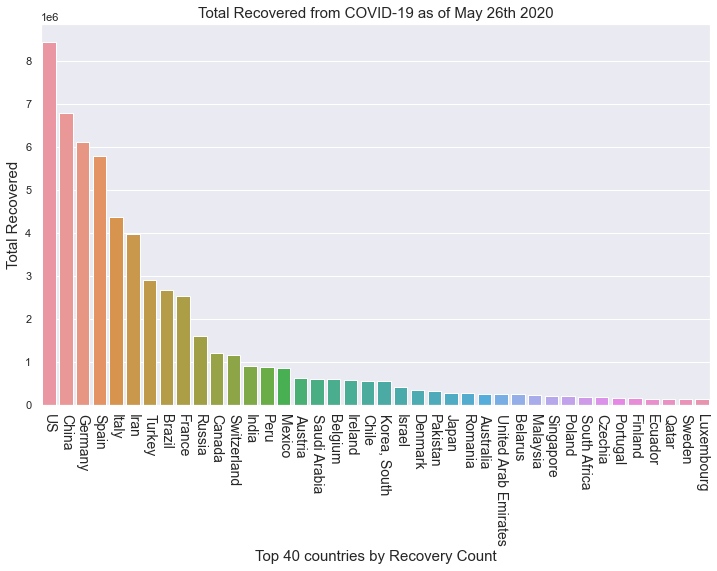

In [99]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(x =  total_recovered_by_country.index[:40], y = 'Total Recovered',
           data = total_recovered_by_country.head(40))
ax.set_xticklabels(total_recovered_by_country.index[:40],
                  fontsize = 14, rotation = -90)
plt.xlabel('Top 40 countries by Recovery Count', fontsize = 15)
plt.ylabel('Total Recovered', fontsize = 15)
plt.title('Total Recovered from COVID-19 as of May 26th 2020', fontsize = 15)

fig.set_size_inches(12,7)
plt.show() 

Total recovered trend of the countries from above bar graph gives us the insight of its healtcare and medical capacity to increase the recovered cases.

In [100]:
death_rate_by_country = pd.merge(total_case_by_country,total_deaths_by_country,
         left_index=True, right_index = True)
death_rate_by_country['Case fatality ratio (CFR)%'] =  (death_rate_by_country['Total Death']/ death_rate_by_country['Total Case'])*100
death_rate_by_country = death_rate_by_country.sort_values('Case fatality ratio (CFR)%', ascending = False)
death_rate_by_country.head(20)

,Total Case,Total Death,Case fatality ratio (CFR)%
Country,,,
MS Zaandam,512,112,21.875000
Yemen,2696,460,17.062315
Belgium,2480956,362702,14.619445
United Kingdom,9150537,1329006,14.523803
France,8746538,1209634,13.829860
Italy,11896347,1568276,13.182837
Bahamas,4103,521,12.698026
Netherlands,2075169,244222,11.768776
Zimbabwe,1760,199,11.306818


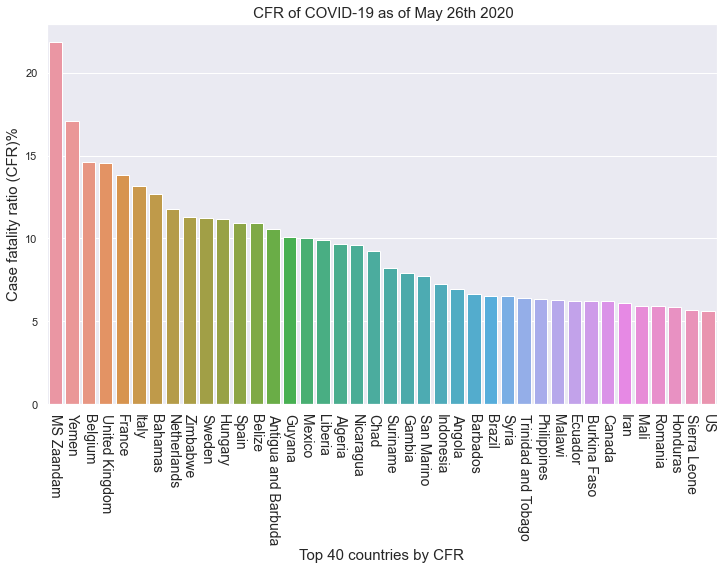

In [101]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(x =  death_rate_by_country.index[:40], y = 'Case fatality ratio (CFR)%',
           data = death_rate_by_country.head(40))
ax.set_xticklabels(death_rate_by_country.index[:40],
                  fontsize = 14, rotation = -90)
plt.xlabel('Top 40 countries by CFR', fontsize = 15)
plt.ylabel('Case fatality ratio (CFR)%', fontsize = 15)
plt.title(' CFR of COVID-19 as of May 26th 2020', fontsize = 15)

fig.set_size_inches(12,7)
plt.show() 

Italy being the epicentre and having highest amount of total cases on Europe at early stage may have triggered the spread of virus to its neighboring countries and regions. Also, most of the top CFR of
these European countries suggest, that people at these regions may have low immunity to survive the
disease.

In [102]:
death_rate_by_country = pd.merge(total_case_by_country,total_deaths_by_country,
         left_index=True, right_index = True)
death_rate_by_country['Case fatality ratio (CFR)%'] =  (death_rate_by_country['Total Death']/ death_rate_by_country['Total Case'])*100
death_rate_by_country = death_rate_by_country.sort_values('Case fatality ratio (CFR)%', ascending = False)
death_rate_by_country.head(20)

,Total Case,Total Death,Case fatality ratio (CFR)%
Country,,,
MS Zaandam,512,112,21.875000
Yemen,2696,460,17.062315
Belgium,2480956,362702,14.619445
United Kingdom,9150537,1329006,14.523803
France,8746538,1209634,13.829860
Italy,11896347,1568276,13.182837
Bahamas,4103,521,12.698026
Netherlands,2075169,244222,11.768776
Zimbabwe,1760,199,11.306818


In [103]:
recovery_rate_by_country = pd.merge(total_case_by_country,total_recovered_by_country,
         left_index=True, right_index = True)
recovery_rate_by_country['Recovery ratio(%)'] = ( recovery_rate_by_country['Total Recovered']/ recovery_rate_by_country['Total Case'])*100
recovery_rate_by_country = recovery_rate_by_country.sort_values('Recovery ratio(%)', ascending = False)
recovery_rate_by_country.head(20)

,Total Case,Total Recovered,Recovery ratio(%)
Country,,,
China,8871610,6776464,76.383700
Cambodia,8024,5888,73.379860
Thailand,170005,124172,73.040205
Iceland,108279,78437,72.439716
Saint Lucia,974,695,71.355236
Brunei,9426,6707,71.154254
New Zealand,81407,57168,70.224919
Iran,5778865,3973261,68.755041
Germany,9046257,6102898,67.463239


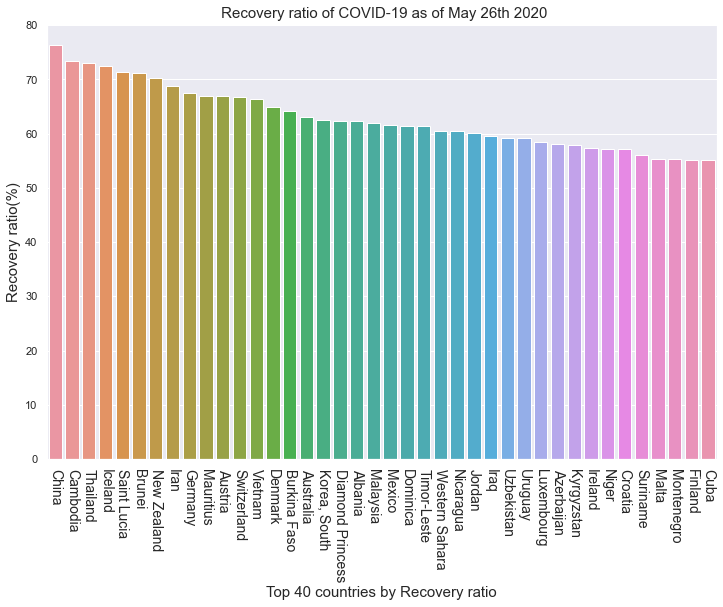

In [104]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(x =  recovery_rate_by_country.index[:40], y = 'Recovery ratio(%)',
           data = recovery_rate_by_country.head(40))
ax.set_xticklabels(recovery_rate_by_country.index[:40],
                  fontsize = 14, rotation = -90)
plt.xlabel('Top 40 countries by Recovery ratio', fontsize = 15)
plt.ylabel('Recovery ratio(%)', fontsize = 15)
plt.title(' Recovery ratio of COVID-19 as of May 26th 2020', fontsize = 15)

fig.set_size_inches(12,8)
plt.show() 

Although, the disease initially started from China but the above graph suggests that it was able to
control and recover the infected population, probably due to strict government response to the
out-break of the disease at that time.

###  Aggregate time Series analysis of Covid-19 around the world

In [105]:
stats_per_day = ds.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].agg(['sum'])
stats_per_day.columns = ['Confirmed', 'Recovered','Deaths']
stats_per_day['Active case'] = stats_per_day['Confirmed']-stats_per_day['Recovered']-stats_per_day['Deaths']
stats_per_day

,Confirmed,Recovered,Deaths,Active case
Date,,,,
2020-01-22,555,28,17,510
2020-01-23,654,30,18,606
2020-01-24,941,36,26,879
2020-01-25,1434,39,42,1353
2020-01-26,2118,52,56,2010
...,...,...,...,...
2020-05-22,5210817,2056643,338160,2816014
2020-05-23,5310362,2112185,342097,2856080
2020-05-24,5407613,2168563,345059,2893991


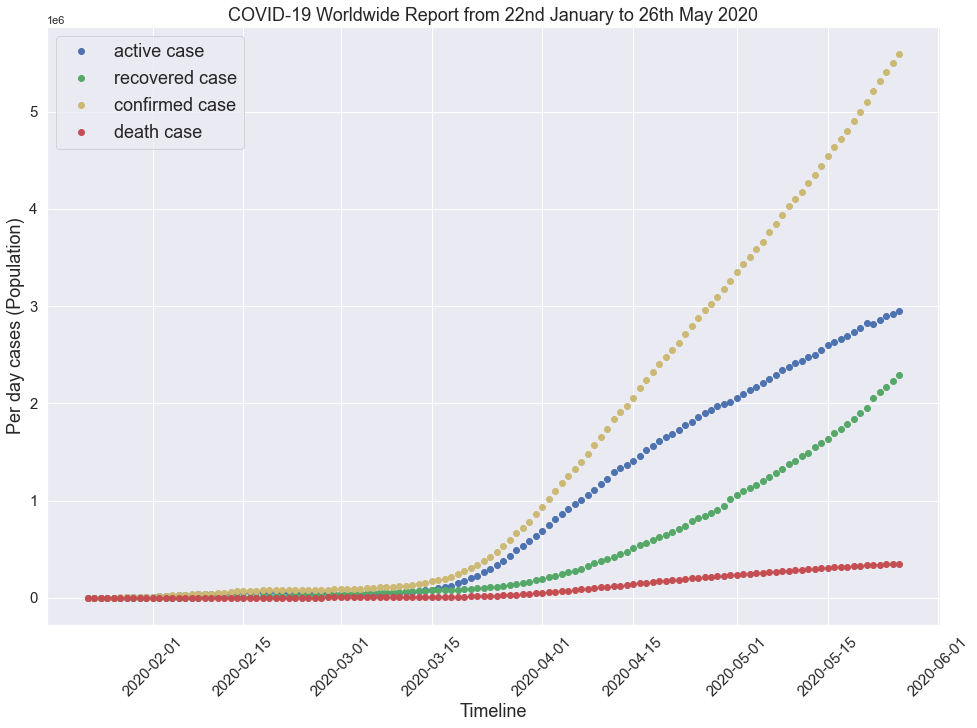

In [106]:

t = np.array(stats_per_day.index)
active = np.array(stats_per_day['Active case'])
recovered = np.array(stats_per_day['Recovered'])
confirmed =  np.array(stats_per_day['Confirmed'])
deaths =  np.array(stats_per_day['Deaths'])

fig = plt.figure(figsize = (16,11))
ax = fig.add_subplot(111)
ax.plot_date(t, active, 'bo', linewidth = 2)
ax.plot_date(t, recovered, 'go', linewidth = 2)
ax.plot_date(t, confirmed, 'yo', linewidth = 2)
ax.plot_date(t, deaths, 'ro', linewidth = 2)
plt.legend(['active case','recovered case','confirmed case','death case'],  prop={'size': 18})

plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Timeline', fontsize= 18)
plt.ylabel('Per day cases (Population)', fontsize=18)
plt.title('COVID-19 Worldwide Report from 22nd January to 26th May 2020', fontsize=18)
plt.show()

Based on above Worldwide report of COVID-19, we can observe the exponential growth of the disease, that starts rather slow initially and then exponentially increases. And like any exponential growth, this report shows a 'tipping point' that starts between 15th March and 1st April on the timeline.

Also, we can analyse that, due to lockdowns and government response to the pendamic on various parts of the world, the  Worldwide  'rate' of recovery per-day increased and that of active case per-day almost remained constant, which further helped the 'rate' of  no. of death case per day to slow down a bit. However, due to COVID-19 incubation period and lack of testing, the 'rate' at which new/confirmed cases per-day increases very high contributing to overall active, recovery and  deaths cases per-day.

Therefore, this 'rate' at which the new/confirmed case per-day when continued, then it could lead to high risk of active cases to infect the healthy part of the society, which leads the growth to accerate even more in an exponential fashion.

Hence, in order to control the pandemic, there must be strict protocols of testing and identification of confirmed cases and isolation of those from recovered or healthy part of the society. And by doing so, it is very important to saturate (or bring down the rate/slope) of the above active case curve, before the health-care capacity of the countries reaches its limits. 

In [107]:
data = stats_per_day[['Confirmed','Recovered','Deaths']].copy()
data['Date'] = data.index

In [108]:
data

,Confirmed,Recovered,Deaths,Date
Date,,,,
2020-01-22,555,28,17,2020-01-22
2020-01-23,654,30,18,2020-01-23
2020-01-24,941,36,26,2020-01-24
2020-01-25,1434,39,42,2020-01-25
2020-01-26,2118,52,56,2020-01-26
...,...,...,...,...
2020-05-22,5210817,2056643,338160,2020-05-22
2020-05-23,5310362,2112185,342097,2020-05-23
2020-05-24,5407613,2168563,345059,2020-05-24


In [109]:
data
x = data.drop('Deaths', 1)
y = data['Deaths']

In [110]:
x = data.drop('Deaths', 1)
y = data['Deaths']

### Prediction/Forecast of  Death cases per-day based on time-series

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x.drop('Date',1), y, test_size = 0.3, shuffle = False)

In [112]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((88, 2), (38, 2), (88,), (38,))

In [113]:
x_train['days'] = np.arange(1,89,1)
x_test['days'] = np.arange(89,127,1)

In [114]:
# Extracting new features 'Confirmed_rate' and 'Recovered_rate'.
train_test = [x_train, x_test]

for dataset in train_test:
    dataset['Confirmed_rate'] = dataset['Confirmed'] - dataset['Confirmed'].shift(1)
    dataset['Recovery_rate'] = dataset['Recovered'] - dataset['Recovered'].shift(1)

In [115]:
x_train['Confirmed_rate'].replace(np.nan, 99, inplace = True)
x_train['Recovery_rate'].replace(np.nan, 2, inplace = True)

In [116]:
x_test['Confirmed_rate'].replace(np.nan, 71322.0, inplace = True)
x_test['Recovery_rate'].replace(np.nan, 22001.0, inplace = True)

In [117]:
# selecting best features to describe the predictive model.
x_train = x_train[['Confirmed','Recovery_rate']]
x_test = x_test[['Confirmed','Recovery_rate']]

In [118]:
x_train

,Confirmed,Recovery_rate
Date,,
2020-01-22,555,2.0
2020-01-23,654,2.0
2020-01-24,941,6.0
2020-01-25,1434,3.0
2020-01-26,2118,13.0
...,...,...
2020-04-14,1975566,25308.0
2020-04-15,2055748,36536.0
2020-04-16,2152181,31076.0


In [119]:
x_test

,Confirmed,Recovery_rate
Date,,
2020-04-19,2400787,22001.0
2020-04-20,2472109,22001.0
2020-04-21,2549046,34597.0
2020-04-22,2624608,30141.0
2020-04-23,2708403,28934.0
2020-04-24,2795731,50605.0
2020-04-25,2881140,27820.0
2020-04-26,2955033,28580.0
2020-04-27,3023722,27692.0


In [120]:
# Model training and scoring on test data.
# after tuning the lasso model, aplha = 3.5.
lss = Lasso(normalize = True , alpha = 3.5)
lss.fit(x_train,y_train)
print('r2_score:',lss.score(x_test,y_test))

r2_score: 0.9425142497671302


In [121]:
y_train_pred = lss.predict(x_train)

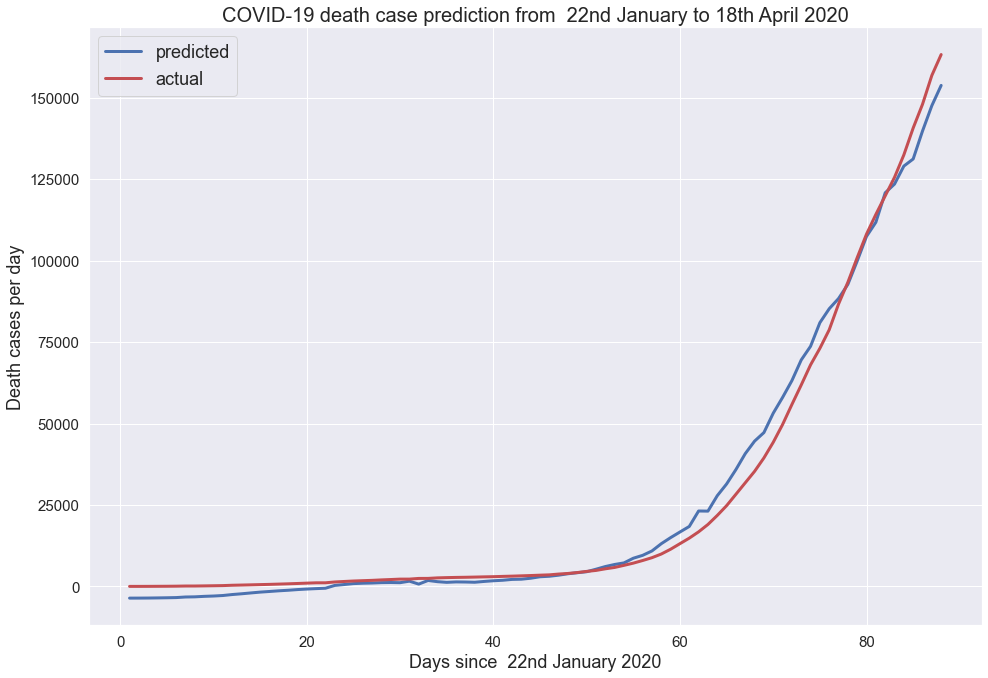

In [122]:
fig = plt.figure(figsize = (16,11))
ax = fig.add_subplot(111)
ax.plot(np.arange(1,89,1),y_train_pred, 'b-', linewidth = 3)
ax.plot(np.arange(1,89,1), y_train, 'r-', linewidth = 3)
plt.legend(['predicted','actual'],prop={'size': 18})
plt.xticks( fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Days since  22nd January 2020', fontsize= 18)
plt.ylabel('Death cases per day', fontsize= 18)
plt.title('COVID-19 death case prediction from  22nd January to 18th April 2020', fontsize= 20)
plt.show()

In [123]:
y_pred = lss.predict(x_test)

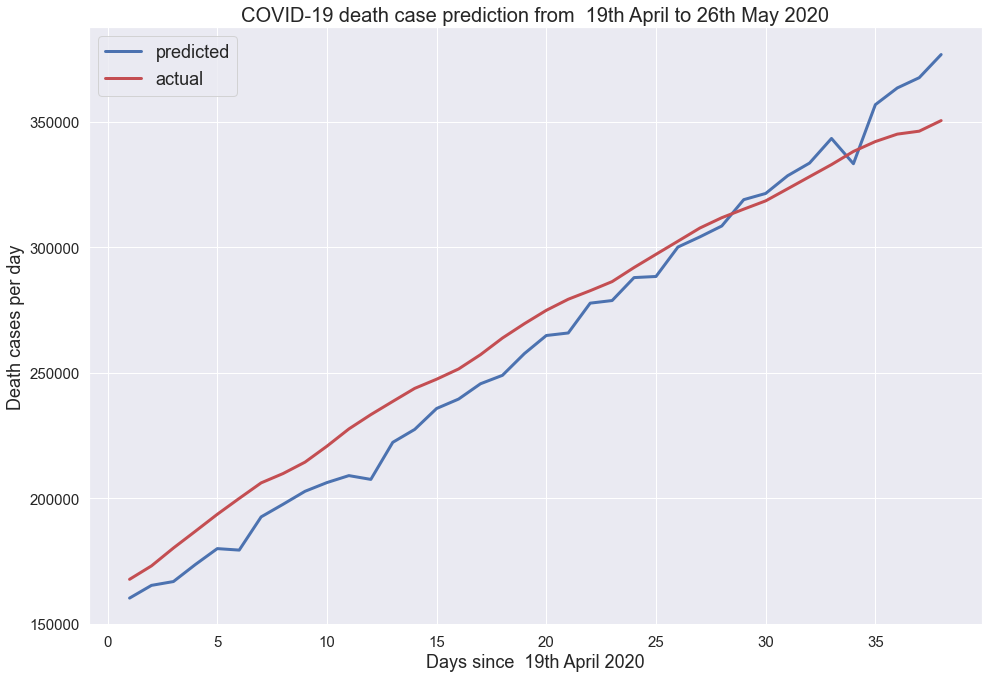

In [124]:
fig = plt.figure(figsize = (16,11))
ax = fig.add_subplot(111)
ax.plot(np.arange(1,39,1),y_pred, 'b-', linewidth = 3)
ax.plot(np.arange(1,39,1), y_test, 'r-', linewidth = 3)
plt.legend(['predicted','actual'],prop={'size': 18})
plt.xticks( fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Days since  19th April 2020', fontsize= 18)
plt.ylabel('Death cases per day', fontsize= 18)
plt.title('COVID-19 death case prediction from  19th April to 26th May 2020', fontsize= 20)
plt.show()

So we have build the predictive model based on confirmed cases per-day and 'rate' per-day at which the infected polulation is been recovered/cured as the model input features and output/target features as Death cases per-day.

It is worth noting that the above prediction results are based on the past data and may not accurately predict the future. Moreover,during actual forcasting, the features of predictor
variables(like Confirmed Cases and rate of recovery per-day) must be calculated or 'seperately predicted' to serve as the input to this predictive model. Also, the confidence interval of 95% 
with respect to output/target variable should be considered for decision making. 

In [125]:
# Saving best model
import joblib

joblib.dump(lss, 'lss_covid_pred.obj')
print('Model successfully saved.')

Model successfully saved.
